# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
weather_api_key="481b7ae195402d3f234a8ccd0ed278f1"



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = "481b7ae195402d3f234a8ccd0ed278f1"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + api_key

#Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        print(f"Processing Record {record} | {city_record}")
        # print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Geraldton
Processing Record 2 | Ribeira Grande
Processing Record 3 | Busselton
Processing Record 4 | Okara
Processing Record 5 | Ushuaia
Processing Record 6 | Vaini
Processing Record 7 | Kapaa
Processing Record 8 | Zhob
Processing Record 9 | Kavieng
Processing Record 10 | Butaritari
Processing Record 11 | Punta Arenas
Processing Record 12 | Saint-Philippe
Processing Record 13 | Calvinia
Processing Record 14 | Lichinga
City not found. Skipping...
Processing Record 15 | Hobart
City not found. Skipping...
Processing Record 16 | Kantilo
City not found. Skipping...
Processing Record 17 | Shache
Processing Record 18 | Saint Paul Harbor
Processing Record 19 | Tasiilaq
City not found. Skipping...
Processing Record 20 | Mount Gambier
Processing Record 21 | Hervey Bay
Processing Record 22 | Deputatsky
Processing Record 23 | San Antonio
Processing Record 24 | Upernavik
Processing Record 25 | Maceió
Processing Record 26

Processing Record 225 | Souillac
Processing Record 226 | Carauari
Processing Record 227 | Kodinsk
Processing Record 228 | Caetité
Processing Record 229 | Lodwar
Processing Record 230 | Itaituba
Processing Record 231 | Sterling
Processing Record 232 | Puerto Escondido
Processing Record 233 | Araouane
City not found. Skipping...
Processing Record 234 | Narsaq
Processing Record 235 | Pacifica
City not found. Skipping...
Processing Record 236 | Broken Hill
Processing Record 237 | Bud
Processing Record 238 | Anshan
Processing Record 239 | Paragominas
Processing Record 240 | Gobabis
Processing Record 241 | Kirkland Lake
Processing Record 242 | Atar
Processing Record 243 | Nampula
Processing Record 244 | Kirakira
Processing Record 245 | Payson
Processing Record 246 | Waipawa
Processing Record 247 | Whyalla
Processing Record 248 | Nouadhibou
Processing Record 249 | Lukovetskiy
Processing Record 250 | Mindelo
Processing Record 251 | Alice Town
Processing Record 252 | Constitución
Processing Rec

Processing Record 452 | Gao
Processing Record 453 | Mama
Processing Record 454 | Dhidhdhoo
Processing Record 455 | Bubaque
Processing Record 456 | Airai
City not found. Skipping...
Processing Record 457 | Tuatapere
Processing Record 458 | Talara
Processing Record 459 | Tynda
Processing Record 460 | Charter Township of Clinton
Processing Record 461 | Orotukan
Processing Record 462 | Chippewa Falls
Processing Record 463 | Pokhvistnevo
Processing Record 464 | Granadilla de Abona
Processing Record 465 | Ruska Poliana
City not found. Skipping...
Processing Record 466 | Lipin Bor
Processing Record 467 | Maracaçumé
Processing Record 468 | Swan Hill
Processing Record 469 | Graaff-Reinet
Processing Record 470 | Gilgit
Processing Record 471 | Ayorou
Processing Record 472 | Karratha
Processing Record 473 | Glarus
Processing Record 474 | Yongchang
Processing Record 475 | Huttwil
Processing Record 476 | Camacha
Processing Record 477 | Dubbo
City not found. Skipping...
Processing Record 478 | Imbitu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:


# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)



# Display count of weather data values 
weather_data.count()



City          587
Cloudiness    587
Country       587
Date          587
Humidity      587
Lat           587
Lng           587
Max Temp      587
Wind Speed    587
dtype: int64

In [5]:

#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,"Cloudiness":cloudiness,"Country":country, "Date":date, "Humidity": humidity,"Lat":lat, "Lng":lng,"Max Temp": max_temp,"Wind Speed":wind_speed
})
#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, output_data_file)

city_data_df.head()

      

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Geraldton,75,AU,1586643530,100,-28.77,114.60,292.15,1.50
1,Ribeira Grande,0,PT,1586643531,71,38.52,-28.70,290.15,3.46
2,Busselton,96,AU,1586643497,69,-33.65,115.33,294.82,3.64
3,Okara,81,PK,1586643533,34,30.81,73.45,298.12,2.04
4,Ushuaia,40,AR,1586643535,80,-54.80,-68.30,278.15,10.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

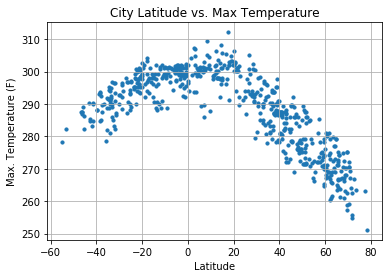

In [6]:
# Latitude Vs Max Temperature plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot
plt.show()

#### Latitude vs. Humidity Plot

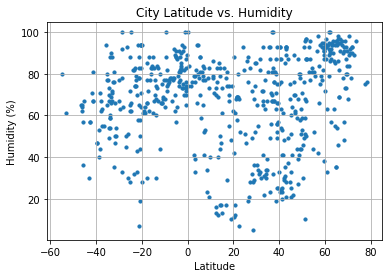

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

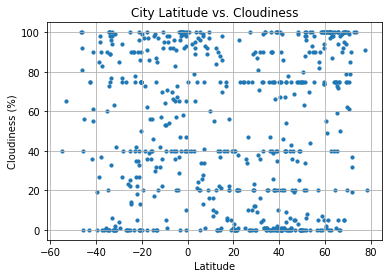

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

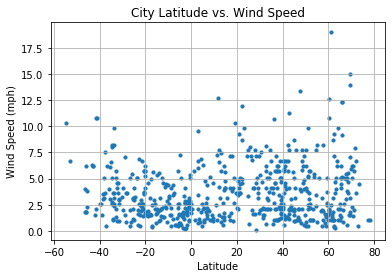

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
# Print out the r-squared value along with the plot.


def felitasplot(x_values, y_values):
    (slope, intercept,rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.show()
     #Print out the r-squared value along with the plot.
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_weather_df = weather_data[weather_data['Lat'] > 0]
southern_weather_df = weather_data[weather_data['Lat'] < 0] 


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

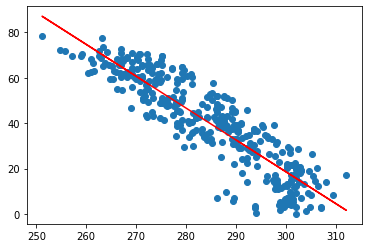

The r-squared is: -0.8955755767743465


In [12]:

# Add the linear regression equation and line to plot
import scipy.stats as st
import numpy as np

felitasplot(northern_weather_df["Max Temp"],northern_weather_df['Lat'])



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

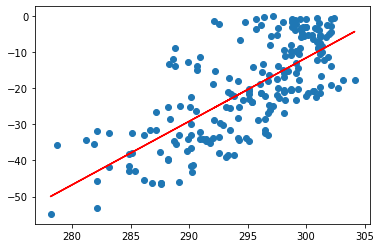

The r-squared is: 0.7297472055605297


In [13]:
felitasplot(southern_weather_df["Max Temp"],southern_weather_df['Lat'])


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

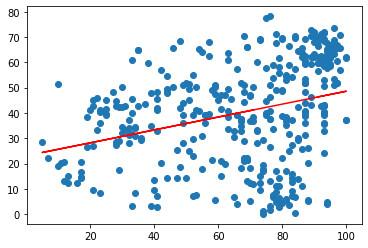

The r-squared is: 0.31095990105602617


In [14]:
felitasplot(northern_weather_df['Humidity'],northern_weather_df['Lat'])


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

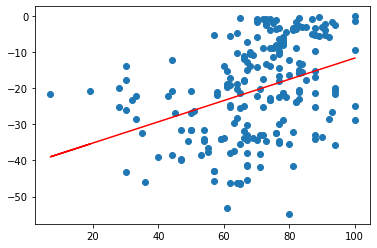

The r-squared is: 0.37068799391309565


In [15]:
felitasplot(southern_weather_df['Humidity'],southern_weather_df['Lat'])



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

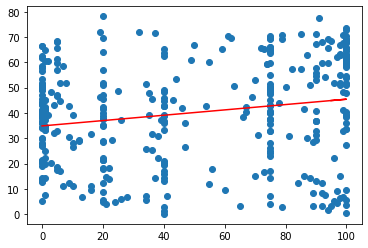

The r-squared is: 0.20368390451524557


In [16]:
felitasplot(northern_weather_df['Cloudiness'],northern_weather_df['Lat'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

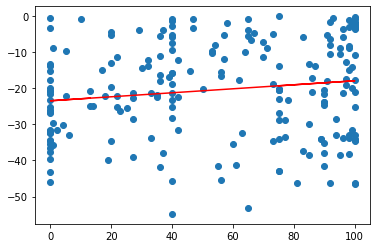

The r-squared is: 0.14870652816050708


In [17]:
felitasplot(southern_weather_df['Cloudiness'],southern_weather_df['Lat'])


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

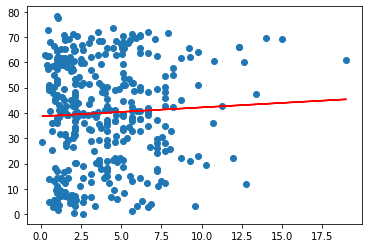

The r-squared is: 0.05116074121983587


In [18]:
felitasplot(northern_weather_df['Wind Speed'],northern_weather_df['Lat'])



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

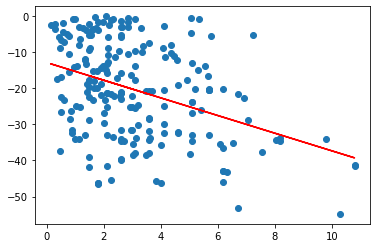

The r-squared is: -0.3815815104123347


In [19]:
felitasplot(southern_weather_df['Wind Speed'],southern_weather_df['Lat'])



#### Analysis: 
According to my scatterplots, 
1. Temperature Vs Latitude , as the latitude increases the temperature is significantly increasing towards the equator (latitude range of-20 to 20)
2. Wind Speed vs Latitude, the wind speed is somewhat slightly different to latitude, highest wind speed outliers occurred at latitudes farther from the equator.
3. Cloudiness and Humidity are relatively consistence accross the lattitude, must be depends on other factors which determine the cloudiness of the day, but this particular analysis, there is a consistance spread accross the latitude.

